After pre-processing and standardizing your data, you saved it to a CSV file named 'preprocessed_data.csv' using the to_csv method. Here are some potential next steps you might consider depending on your project goals:

Exploratory Data Analysis (EDA):
Explore the preprocessed data to gain insights into its distribution, relationships between variables, and any patterns. This might involve creating visualizations or summary statistics.

In [51]:
# Example EDA with pandas and seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# Load the preprocessed data
data = pd.read_csv("E:/CustomerPersonalityAnalysis/notebooks/preprocessed_data.csv")

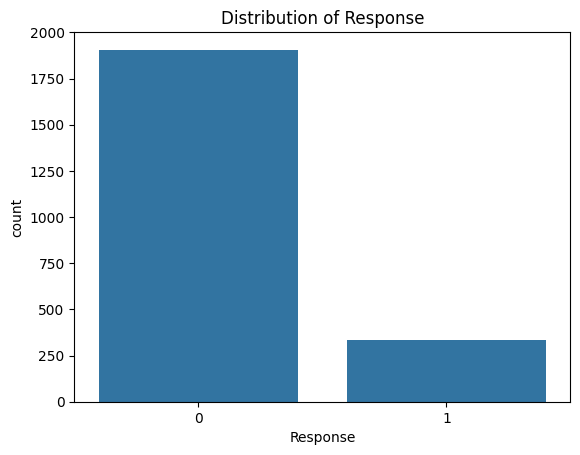

In [53]:

# Exploratory Data Analysis (EDA)
# Visualize the distribution of the target variable
sns.countplot(x='Response', data=data)
plt.title('Distribution of Response')
plt.show()

In [54]:
# Explore numerical features
numerical_columns = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts']
data[numerical_columns].describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts
count,2240.000000,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2240.000000,2240.000000
mean,1968.805804,4.837400e-17,-1.268826e-17,-6.978545e-17,-2.061843e-17,166.950000,37.525446
std,11.984069,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,225.715373,54.628979
min,1893.000000,-2.018090e+00,-1.696001e+00,-9.031668e-01,-6.614492e-01,0.000000,0.000000
25%,1959.000000,-6.674801e-01,-8.671566e-01,-8.325919e-01,-6.363012e-01,16.000000,3.000000
50%,1970.000000,-2.020403e-02,-3.777284e-03,-3.875991e-01,-4.602650e-01,67.000000,12.000000
75%,1977.000000,6.408743e-01,8.596020e-01,5.952483e-01,1.684356e-01,232.000000,50.000000
max,1996.000000,2.454513e+01,1.722981e+00,3.533390e+00,4.343008e+00,1725.000000,259.000000


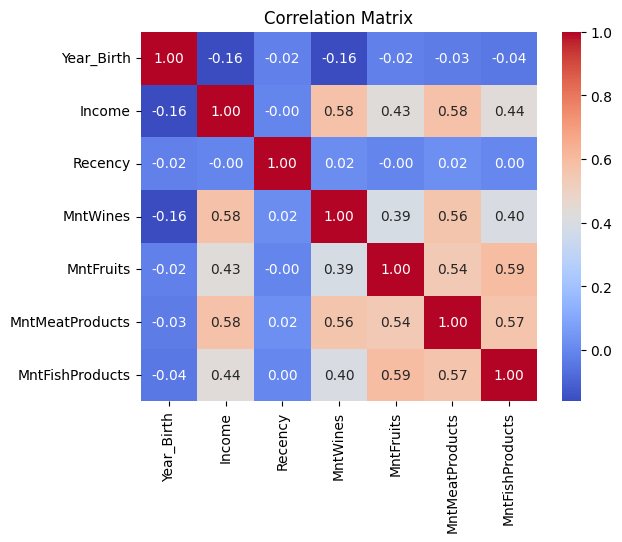

In [55]:
# Visualize the correlation matrix
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [56]:
# Feature Engineering: Convert 'Dt_Customer' to numerical features
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['Customer_Year'] = data['Dt_Customer'].dt.year
data['Customer_Month'] = data['Dt_Customer'].dt.month
data['Customer_Day'] = data['Dt_Customer'].dt.day

In [57]:

# Drop the original 'Dt_Customer' column and non-numeric columns
data.drop(['Dt_Customer'], axis=1, inplace=True)

In [58]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Response', axis=1), data['Response'], test_size=0.2, random_state=42)


In [59]:
# Model Training
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

In [61]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.86


In [62]:

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       379
           1       0.67      0.23      0.34        69

    accuracy                           0.86       448
   macro avg       0.77      0.61      0.63       448
weighted avg       0.84      0.86      0.83       448

